In [4]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

crime_df = pd.read_csv("USArrests.csv")
crime_df.head()

,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


# Clustering

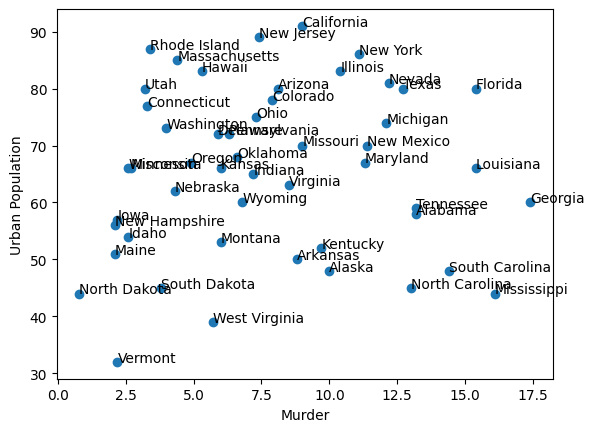

In [3]:
from sklearn.cluster import KMeans

X = crime_df.drop('State', axis=1)
y = crime_df['State']

plt.scatter(X['Murder'],X['UrbanPop'])

#enumerating allows us to keep track
# of the indexes associated with each 
# iteration
for i, txt in enumerate(y):
    plt.annotate(txt, (X['Murder'][i],X['UrbanPop'][i]))

plt.xlabel('Murder')
plt.ylabel('Urban Population')
plt.show()


In [7]:
inertias = []
distortions = []

for k in range(1,10):
    # build and the fit model
    model = KMeans(n_clusters=k).fit(X)

    #Distortion is the average of the squared
    # distance from the cluster center
    # to the data points (in Euclidean space)
    # Euclidean space = standard 2+ dimensional space
    distance = cdist(X, model.cluster_centers_,
                     'euclidean')
    distortion = sum(np.min(distance, axis=1))/X.shape[0]
    distortions.append(distortion)

    # inertia is calculated by measuring
    # the distnace between each data point
    # and the centroid and summing the square
    # across the cluster. A good model
    # is one with low inertia or distortion
    # AND a low number of clusters

    inertia = model.inertia_
    inertias.append(inertia)


Text(0.5, 1.0, 'Elbow Method with Distortion')

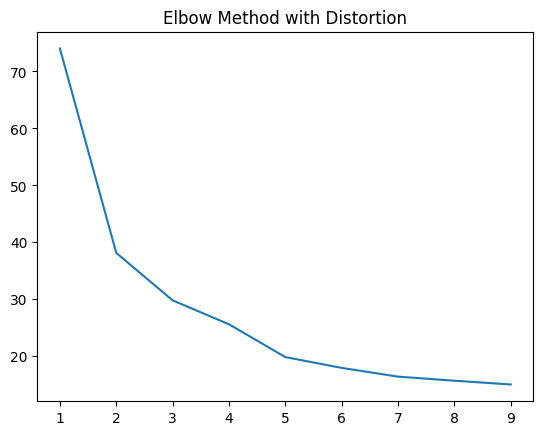

In [8]:
plt.plot(range(1,10), distortions)
plt.title('Elbow Method with Distortion')

Text(0.5, 1.0, 'Elbow Method with Inertia')

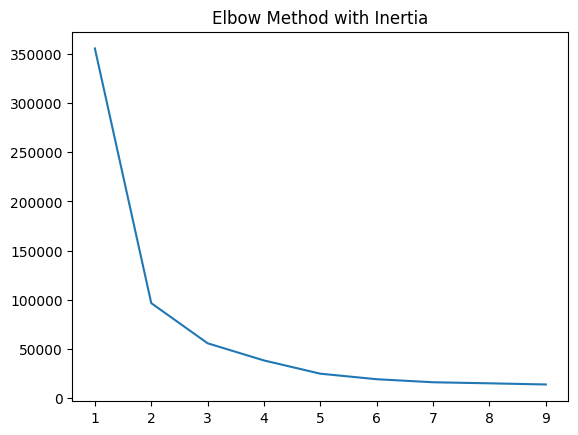

In [9]:
plt.plot(range(1,10), inertias)
plt.title('Elbow Method with Inertia')

# Hierarchical

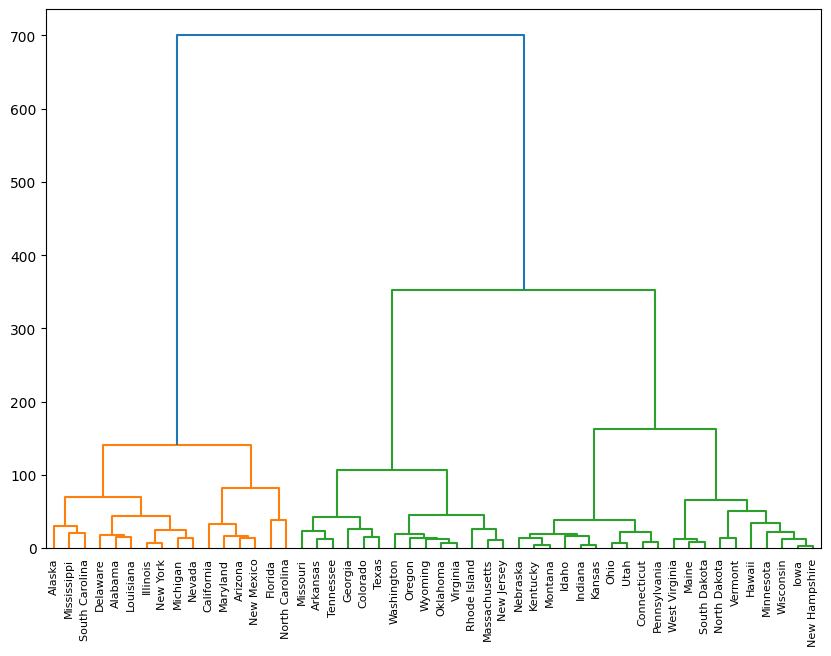

In [11]:
from scipy.cluster.hierarchy import dendrogram, linkage
linked = linkage(X, 'ward')
plt.figure(figsize=(10,7))

dendro = dendrogram(linked, labels = list(y))

In [12]:
from sklearn.cluster import AgglomerativeClustering
# divides the population into several clusters
# such that the data points are in the same
# cluster as other data points that are
# similar to them. Those in different
# clusters are more dissimilar
cluster = AgglomerativeClustering(n_clusters=3,linkage='ward')
cluster.fit_predict(X)

array([1, 1, 1, 2, 1, 2, 0, 1, 1, 2, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 2, 1,
       0, 1, 2, 0, 0, 1, 0, 2, 1, 1, 1, 0, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0,
       0, 2, 2, 0, 0, 2])

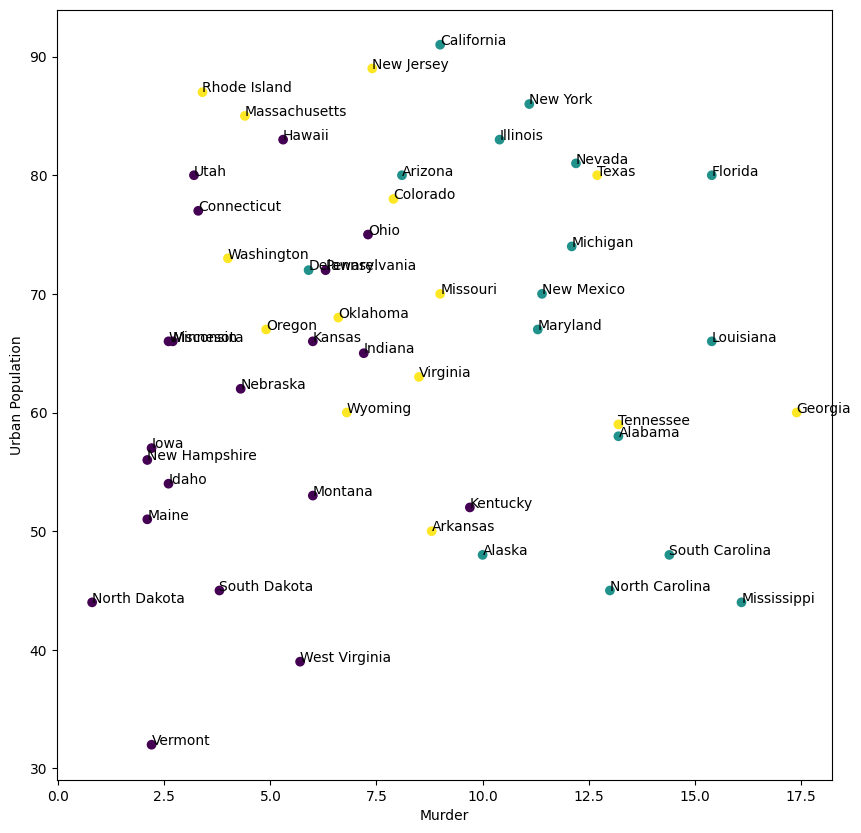

In [13]:
plt.figure(figsize=(10,10))
plt.scatter(X['Murder'],X['UrbanPop'],c=cluster.labels_)
for i, txt in enumerate(y):
    plt.annotate(txt, (X['Murder'][i],X['UrbanPop'][i]))

plt.xlabel('Murder')
plt.ylabel('Urban Population')
plt.show()

# Dimensionality Reduction

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

diabetes_df = pd.read_csv("../week_06/diabetes.csv")
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [16]:
X = diabetes_df.drop('Outcome',axis=1)
y = diabetes_df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,
                                                    random_state=42,
                                                    stratify=y)

model = LogisticRegression(random_state=42).fit(X_train,y_train)

# predicted outcome
y_predicted = model.predict(X_test)

print(model.score(X_test, y_test))

0.7402597402597403


/Users/lex/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


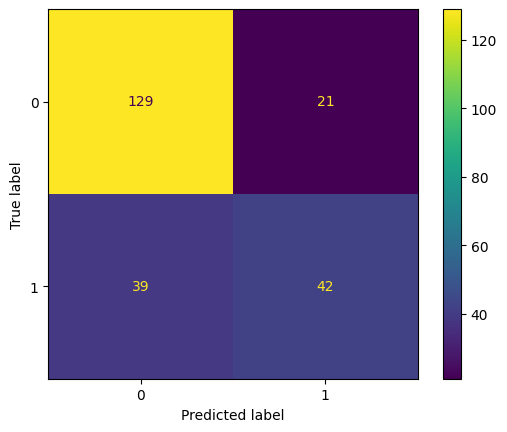

In [17]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_predicted)

In [18]:
from sklearn.decomposition import TruncatedSVD
# singular value decomposition = factorization
# technique for real or complex numbers in a
# matrix. In short, it is untangling patterns
# in the numbers using matrix decomposition
# (linear algebra concept). 
# truncatedSVD is typically used for sparse
# datasets (this one isnt that) and it (unlike
# some other dimensionality reduction techniques)
# doesnt produce a list of the features
# it is selecting because it is more abstract
# than that
svd = TruncatedSVD(n_components=6)
X_train_svd = svd.fit_transform(X_train)
X_test_svd = svd.fit_transform(X_test)

model = LogisticRegression(random_state=42).fit(X_train_svd, y_train)

model.score(X_test_svd, y_test)

0.70995670995671

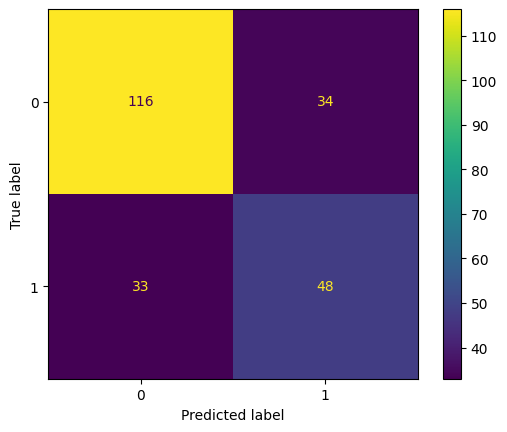

In [19]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(model, X_test_svd, y_test)